In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv("creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
columns=[c for c in df.columns if(c not in ['Class'])]
len(columns)

30

In [3]:
from collections import Counter
print("Class Label Counts: {}".format(Counter(df.Class)))

Class Label Counts: Counter({0: 284315, 1: 492})


In [4]:
X=df[columns]
y=df['Class']
(X.shape, y.shape)

((284807, 30), (284807,))

In [5]:
LABELS=['Normal', "Fraud"]

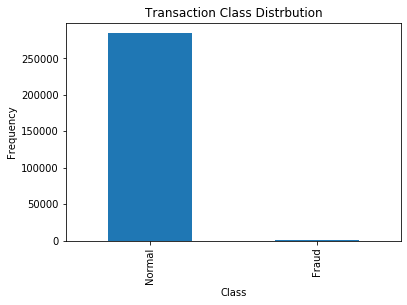

In [6]:
pd.value_counts(df['Class'], sort=True).plot(kind="bar")
plt.title("Transaction Class Distrbution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(range(2), LABELS)
plt.show()

In [7]:
normal=df[df['Class'] == 0]
fraud=df[df['Class'] == 1]
(normal.shape, fraud.shape)

((284315, 31), (492, 31))

In [8]:
from imblearn.combine import SMOTETomek
## For OverSampling (combo of both under and over sampling)

smk=SMOTETomek(random_state=42)
X_res, y_res=smk.fit_sample(X, y)
(X_res.shape, y_res.shape)

Using TensorFlow backend.


((567562, 30), (567562,))

In [9]:
print("Original Dataset Shape: {}".format(Counter(y)))
print("OverSample Dataset Shape: {}".format(Counter(y_res)))

Original Dataset Shape: Counter({0: 284315, 1: 492})
OverSample Dataset Shape: Counter({0: 283781, 1: 283781})


In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
os=RandomOverSampler(random_state=42)
X_os, y_os=os.fit_sample(X, y)

In [12]:
print("Original Dataset Shape: {}".format(Counter(y)))
print("OverSample Dataset Shape: {}".format(Counter(y_os)))

Original Dataset Shape: Counter({0: 284315, 1: 492})
OverSample Dataset Shape: Counter({0: 284315, 1: 284315})


In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_os, y_os, test_size=0.2, random_state=100)

In [15]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9999384485517824

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=model.predict(X_test)
print("Accuracy Score: {}\n".format(np.round(accuracy_score(y_pred, y_test)*100, 4)))
print("Classification Report: \n{}\n".format(classification_report(y_pred, y_test)))
cm=confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n{}".format(cm))

Accuracy Score: 99.9938

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56573
           1       1.00      1.00      1.00     57153

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix: 
[[56573     0]
 [    7 57146]]
